# Sentence Embedding Time Series Generation

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from tqdm import tqdm
import random
import ast
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import joblib
from gensim.utils import tokenize
from gensim.models import Doc2Vec
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('../data/evaluation/lyrics_eval.csv')

In [3]:
df.head()

,index,lyrics,genre,outlier,id,similar_lyrics,random_lyrics
0,17253,"[""All i know when #i'm# with you"", 'My little...",rap,False,17253,"[""All y knew was #i'm# with that"", 'My little...","['The more you see of your love', 'The more yo..."
1,24217,"[""Kells, you know i can't keep doing this, i g...",rap,False,24217,"[""Kells, your know im can't resist doing it, i...","['Oh God! Oh God! Ugh', ""9-1-1 What's your eme..."
2,18238,"['Put on your booty shorts', 'Ooh, I really li...",rap,False,18238,"['Put on those booty kit', 'Ooh, I really like...","['Verse One: Raekwon the Chef', 'Machine gun r..."
3,17181,"['Fargo, get on some real yard shit', 'Come in...",rap,False,17181,"['Fargo, spilling over the real yard shit', 'C...","[""See you've got the new biography"", 'Where di..."
4,14845,"['Hands up in the air', 'I just want the', 'I ...",rap,False,14845,"['Hands flung into the air', 'I just wanted to...","['More rest and sex is all a nigga needs', 'In..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           100 non-null    int64 
 1   lyrics          100 non-null    object
 2   genre           100 non-null    object
 3   outlier         100 non-null    bool  
 4   id              100 non-null    int64 
 5   similar_lyrics  100 non-null    object
 6   random_lyrics   100 non-null    object
dtypes: bool(1), int64(2), object(4)
memory usage: 4.9+ KB


In [5]:
df['lyrics'] = list(map(lambda x: ast.literal_eval(x), df['lyrics']))
df['similar_lyrics'] = list(map(lambda x: ast.literal_eval(x), df['similar_lyrics']))
df['random_lyrics'] = list(map(lambda x: ast.literal_eval(x), df['random_lyrics']))

In [6]:
random.choice(df['lyrics'])

['Boy you know,',
 "I'm kinda tipsy,",
 'I got all the dolls with me',
 "You know how them bottle's get me",
 "We gon' have some fun",
 'Boy you know,',
 "I'm kinda tipsy,",
 'I got all the dolls with me',
 "You know how them bottle's get me",
 "We gon' have some fun",
 'All them other models bottling',
 'Like mamas bottle tasty',
 'If you pop my bottle all the models gonna hate me',
 'When my bottle pop',
 'When my bottle pop',
 'When my bottle pop',
 'When my bottle pop',
 'Every girl dreams of putting herself in pearls',
 'Wanna be the fast driver of a shiny car',
 'But the good girls suddely the bad girls',
 'just because they wanna be a movie star',
 'When my bottle pop',
 'When my bottle pop',
 'When my bottle pop',
 'When my bottle pop',
 'When my bottle pop',
 'When my bottle pop',
 'When my bottle pop',
 'When my bottle pop',
 'Every girl feels this world belongs to her',
 "No matter who make her purr she's a super star",
 'Now the worry is us my girl with curves',
 "That'll m

In [7]:
toy_lyrics = pd.read_csv('../data/toy-lyrics/toy_lyr.csv', sep='\t')
toy_lyrics.head()

,lyrics,part
0,"I wake up every morning, with the sun in my eyes",verse
1,"I stumble out of bed, and I hit the ground run...",verse
2,"I've got a lot on my plate, but I don't mind t...",verse
3,"I know I've got what it takes, to make it down...",verse
4,"I'm living for today, and I'm chasing my dreams",chorus


In [8]:
eg_lyrics = list(toy_lyrics['lyrics'])
eg_lyrics

['I wake up every morning, with the sun in my eyes',
 'I stumble out of bed, and I hit the ground running',
 "I've got a lot on my plate, but I don't mind the load",
 "I know I've got what it takes, to make it down the road",
 "I'm living for today, and I'm chasing my dreams",
 "I won't let anyone stand in my way, or burst at the seams",
 "I'm on a mission, to reach for the stars",
 "I'm unstoppable, behind the steering wheel of my car",
 "I hit the pavement, and I don't look back",
 "I've got my foot on the gas, and I'm on the right track",
 "I know I've got what it takes, to make it to the top",
 "I won't stop until I reach the mountaintop",
 "I'm living for today, and I'm chasing my dreams",
 "I won't let anyone stand in my way, or burst at the seams",
 "I'm on a mission, to reach for the stars",
 "I'm unstoppable, behind the steering wheel of my car",
 "I've got my eyes on the prize, and I won't let it go",
 "I'll keep on fighting, with all my might and my mojo"]

## Sentence BERT

In [9]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Generate a multivariate time series for text as a sequence of sentence embedding (SBERT)
generate_multi_ts = lambda lyrics, model: np.array([model.encode(verse) for verse in lyrics])

In [10]:
eg_multi_ts = generate_multi_ts(eg_lyrics, model)
eg_multi_ts.shape

(18, 384)

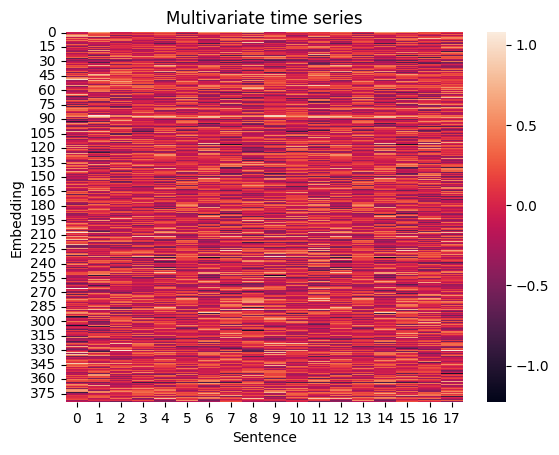

In [11]:
fig, ax = plt.subplots()
ax = sns.heatmap(eg_multi_ts.T)
ax.set_xlabel('Sentence')
ax.set_ylabel('Embedding')
ax.set_title('Multivariate time series')
plt.show()

In [12]:
parts_of_lyrics = list(toy_lyrics['part'])
color_map = {}
for idx, part_of_lyrics in enumerate(list(dict.fromkeys(parts_of_lyrics))):    
    # Map color excluding first color of the palette 
    color_map[part_of_lyrics] = sns.color_palette()[idx+1]

In [13]:
eg_uniavg_ts = np.mean(eg_multi_ts, axis=1)

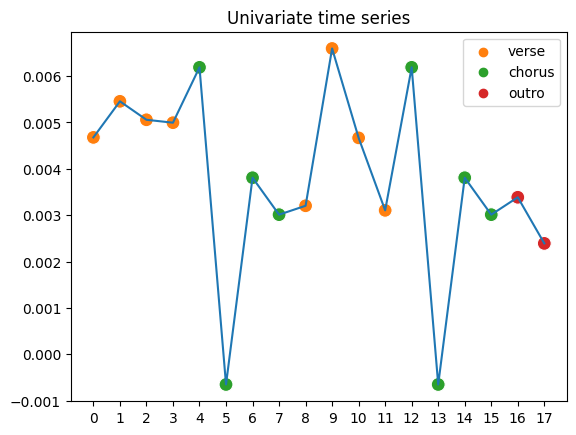

In [14]:
fig, ax = plt.subplots()
ax = sns.lineplot(eg_uniavg_ts)
# Draw dots representing parts of the lyrics
ax = sns.scatterplot(y = eg_uniavg_ts, 
                     x = range(len(eg_uniavg_ts)),
                     hue=parts_of_lyrics, s=100,
                     palette=color_map)
ax.set_title('Univariate time series')
ax.set_xticks(range(len(eg_uniavg_ts)))
plt.show()

In [15]:
eg_unimax_ts = np.max(eg_multi_ts, axis=1)

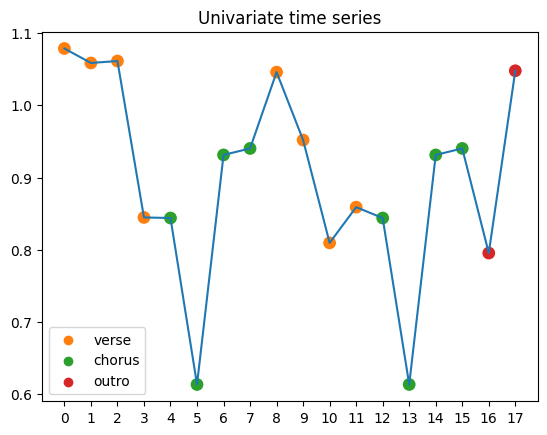

In [16]:
fig, ax = plt.subplots()
ax = sns.lineplot(eg_unimax_ts)
# Draw dots representing parts of the lyrics
ax = sns.scatterplot(y = eg_unimax_ts, 
                     x = range(len(eg_unimax_ts)),
                     hue=parts_of_lyrics, s=100,
                     palette=color_map)
ax.set_title('Univariate time series')
ax.set_xticks(range(len(eg_unimax_ts)))
plt.show()

In [17]:
pca = PCA(n_components=1, random_state=0)

pca_output = pca.fit_transform(eg_multi_ts)

eg_unipca_ts = np.array(list(
    map(lambda unique_element: unique_element[0], pca_output)))

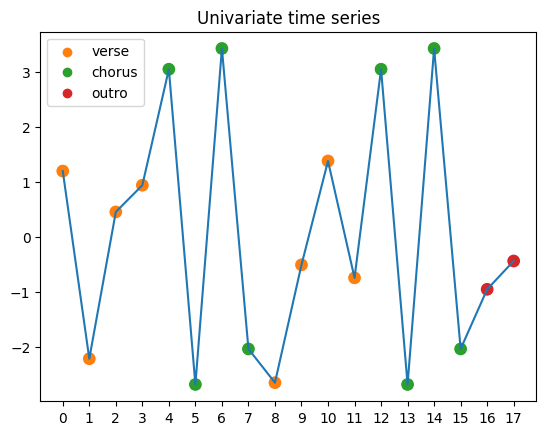

In [18]:
fig, ax = plt.subplots()
ax = sns.lineplot(eg_unipca_ts)
# Draw dots representing parts of the lyrics
ax = sns.scatterplot(y = eg_unipca_ts, 
                     x = range(len(eg_unipca_ts)),
                     hue=parts_of_lyrics, s=100,
                     palette=color_map)
ax.set_title('Univariate time series')
ax.set_xticks(range(len(eg_unipca_ts)))
plt.show()

In [19]:
global_pca = joblib.load('../models/sbert_pca.pkl')

In [20]:
pca_output = global_pca.transform(eg_multi_ts)

eg_unigpca_ts = np.array(list(
    map(lambda unique_element: unique_element[0], pca_output)))

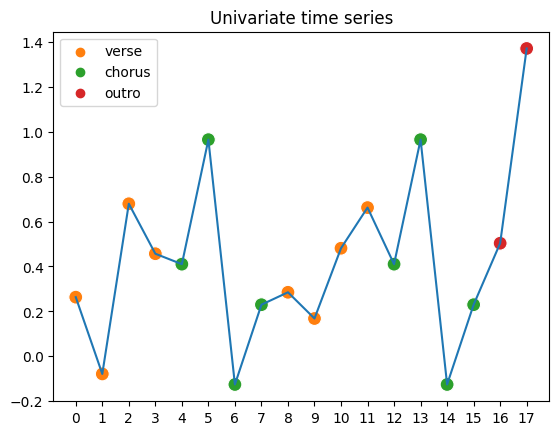

In [21]:
fig, ax = plt.subplots()
ax = sns.lineplot(eg_unigpca_ts)
# Draw dots representing parts of the lyrics
ax = sns.scatterplot(y = eg_unigpca_ts, 
                     x = range(len(eg_unigpca_ts)),
                     hue=parts_of_lyrics, s=100,
                     palette=color_map)
ax.set_xticks(range(len(eg_unigpca_ts)))
ax.set_title('Univariate time series')
plt.show()

In [22]:
def generate_uni_ts(multi_ts, normalize=False, pooling_method='avg', scaler=None, pca=None):
    """
    Convert a multi-variate time series represented as a numpy array into a uni-variate time series.
    
    Parameters
    ----------
    multi_ts : numpy array
        A 2D array representing the multi-variate time series with shape (n_samples, n_features)
    normalize: bool, optional
        Whether to normalize the input data using standard scaler. Default is False.
    pooling_method : str, optional
        The method to use for pooling the multi-variate time series into a uni-variate time series.
        Must be one of 'avg', 'max', or 'pca'. Default is 'avg'.
    scaler: object, optional
        Scaler object to use to normalize the data. Default is None.
    pca: object, optional
        PCA object to use to reduce the data. Default is None.
        
    Returns
    -------
    uni_ts : numpy array
        A 1D array representing the uni-variate time series with shape (n_samples,)
        
    Raises
    ------
    ValueError
        If an invalid value is passed for the pooling_method
    """
    if normalize:
        if scaler is None:
            scaler = StandardScaler()
            multi_ts = scaler.fit_transform(multi_ts)
        else:
            multi_ts = scaler.transform(multi_ts)
    if pooling_method=='avg':            
        uni_ts = np.mean(multi_ts, axis=1)            
    elif pooling_method=='max':            
        uni_ts = np.max(multi_ts, axis=1)            
    elif pooling_method=='pca':                
        if pca is None:            
            pca = PCA(n_components=1, random_state=0)
            pca_output = pca.fit_transform(multi_ts)
        else: 
            pca_output = pca.transform(multi_ts)       
        uni_ts = np.array(list(
            map(lambda unique_element: unique_element[0] , pca_output)))                                     
    else:
        raise ValueError("Invalid pooling_method passed. Please use either 'avg', 'max' or 'pca'.")        
    return uni_ts

In [23]:
print(any(eg_uniavg_ts == generate_uni_ts(eg_multi_ts,
                                          normalize=False, 
                                          pooling_method='avg')))

print(any(eg_unimax_ts == generate_uni_ts(eg_multi_ts, 
                                          normalize=False, 
                                          pooling_method='max')))

print(any(eg_unipca_ts == generate_uni_ts(eg_multi_ts, 
                                          normalize=False, 
                                          pooling_method='pca')))

print(any(eg_unigpca_ts == generate_uni_ts(eg_multi_ts, 
                                           normalize=False, 
                                           pooling_method='pca', 
                                           scaler=None, 
                                           pca=global_pca)))

True
True
True
True


In [ ]:
methods = [{'pooling_method': 'avg', 'normalize': False, 'scaler': None, 'pca': None, 'filename': 'avg'},
           {'pooling_method': 'max', 'normalize': False, 'scaler': None, 'pca': None, 'filename': 'max'},
           {'pooling_method': 'pca', 'normalize': False, 'scaler': None, 'pca': None, 'filename': 'pca'},
           {'pooling_method': 'pca', 'normalize': False, 'scaler': None, 'pca': global_pca, 'filename': 'gpca'},
           ]

for method in methods:    
    print(f'{method["filename"]}:')    
    ts_data = {}
    for lyrics_type in ['lyrics', 'similar_lyrics', 'random_lyrics']:
        print(lyrics_type)
        ts_data[lyrics_type] = []
        for lyr in tqdm(df[lyrics_type]):
            multi_ts = generate_multi_ts(lyr, model)
            uni_ts = generate_uni_ts(multi_ts, 
                                     normalize=method['normalize'], 
                                     pooling_method=method['pooling_method'],
                                     scaler=method['scaler'],
                                     pca=method['pca'])
            uni_ts = list(uni_ts)
            ts_data[lyrics_type].append(uni_ts)
    ts_data = pd.DataFrame(ts_data)

    filename = f'../data/evaluation/time-series/sbert_{method["filename"]}_ts.csv'
    ts_data.to_csv(filename, index=False)
    print('___')

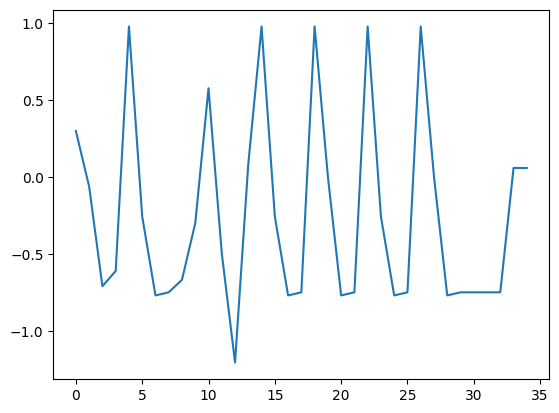

In [25]:
plt.plot(random.choice(ts_data['lyrics']))

## Doc2Vec

In [26]:
def tokenize_lyrics(lyrics, remove_stop_words=True):
    tokenized_lyrics = []
    for verse in lyrics:
        tokens = list(tokenize(verse, lowercase=True))
        if remove_stop_words:
            stop_words = stopwords.words('english')
            tokens = [token for token in tokens if token not in stop_words]
        tokenized_lyrics.append(tokens)
    return tokenized_lyrics

In [27]:
tokenize_lyrics(eg_lyrics)

[['wake', 'every', 'morning', 'sun', 'eyes'],
 ['stumble', 'bed', 'hit', 'ground', 'running'],
 ['got', 'lot', 'plate', 'mind', 'load'],
 ['know', 'got', 'takes', 'make', 'road'],
 ['living', 'today', 'chasing', 'dreams'],
 ['let', 'anyone', 'stand', 'way', 'burst', 'seams'],
 ['mission', 'reach', 'stars'],
 ['unstoppable', 'behind', 'steering', 'wheel', 'car'],
 ['hit', 'pavement', 'look', 'back'],
 ['got', 'foot', 'gas', 'right', 'track'],
 ['know', 'got', 'takes', 'make', 'top'],
 ['stop', 'reach', 'mountaintop'],
 ['living', 'today', 'chasing', 'dreams'],
 ['let', 'anyone', 'stand', 'way', 'burst', 'seams'],
 ['mission', 'reach', 'stars'],
 ['unstoppable', 'behind', 'steering', 'wheel', 'car'],
 ['got', 'eyes', 'prize', 'let', 'go'],
 ['keep', 'fighting', 'might', 'mojo']]

In [28]:
model = Doc2Vec.load("../models/doc2vec.model")

In [29]:
# Generate a multivariate time series for text as a sequence of sentence embedding (Doc2Vec)
generate_multi_ts = lambda lyrics, model: np.array([model.infer_vector(verse) for verse in lyrics])

In [30]:
eg_tokenized_lyrics = tokenize_lyrics(eg_lyrics)

eg_multi_ts = generate_multi_ts(eg_tokenized_lyrics, model)
eg_multi_ts.shape

(18, 50)

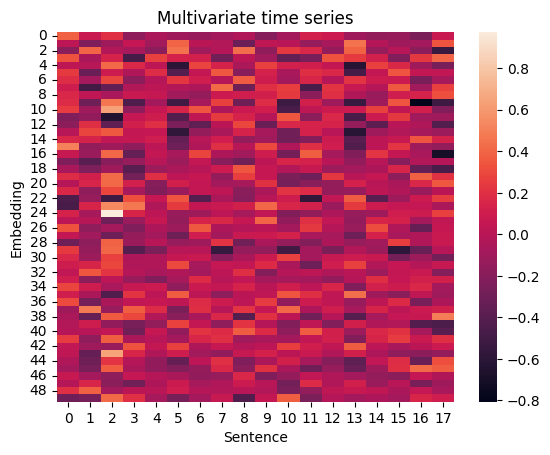

In [31]:
fig, ax = plt.subplots()
ax = sns.heatmap(eg_multi_ts.T)
ax.set_xlabel('Sentence')
ax.set_ylabel('Embedding')
ax.set_title('Multivariate time series')
plt.show() 

In [32]:
global_scaler = joblib.load('../models/d2v_scaler.pkl')
global_pca = joblib.load('../models/d2v_pca.pkl')

In [ ]:
methods = [{'pooling_method': 'avg', 'normalize': True, 'scaler': None, 'pca': None, 'filename': 'avg'},
           {'pooling_method': 'max', 'normalize': True, 'scaler': None, 'pca': None, 'filename': 'max'},
           {'pooling_method': 'pca', 'normalize': True, 'scaler': None, 'pca': None, 'filename': 'pca'},
           {'pooling_method': 'pca', 'normalize': True, 'scaler': global_scaler, 'pca': global_pca, 'filename': 'gpca'},
           ]

for method in methods:    
    print(f'{method["filename"]}:')    
    ts_data = {}
    for lyrics_type in ['lyrics', 'similar_lyrics', 'random_lyrics']:
        print(lyrics_type)
        ts_data[lyrics_type] = []
        for lyr in tqdm(df[lyrics_type]):
            tokenized_lyr = tokenize_lyrics(lyr)
            multi_ts = generate_multi_ts(tokenized_lyr, model)
            uni_ts = generate_uni_ts(multi_ts, 
                                     normalize=method['normalize'], 
                                     pooling_method=method['pooling_method'],
                                     scaler=method['scaler'],
                                     pca=method['pca'])
            uni_ts = list(uni_ts)
            ts_data[lyrics_type].append(uni_ts)
    ts_data = pd.DataFrame(ts_data)

    filename = f'../data/evaluation/time-series/d2v_{method["filename"]}_ts.csv'
    ts_data.to_csv(filename, index=False)
    print('___')

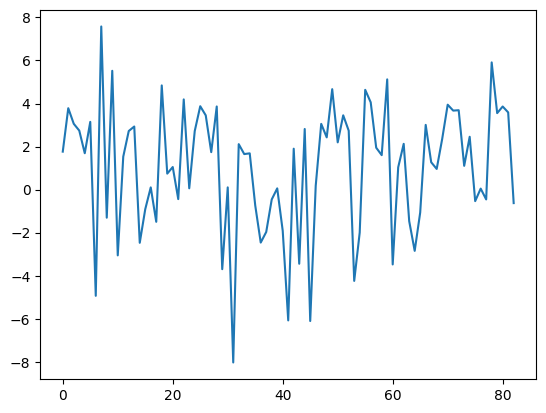

In [34]:
plt.plot(random.choice(ts_data['lyrics']))